# Prediction of ground state energies of molecules

## Libraries Importing and Date processing

### Imports

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

### Data exploration

In [10]:
df = pd.read_csv('roboBohr.csv')
print(f'Data frame dimentions: {df.shape}')

Data frame dimentions: (16242, 1278)


In [11]:
print(df.columns)

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1267', '1268', '1269', '1270', '1271', '1272', '1273', '1274',
       'pubchem_id', 'Eat'],
      dtype='object', length=1278)


#### Columns explaination
<!-- UL -->
* **Index** - For each molecule (redundant and will be removed).
* **0:1274** - 1275 molecular features in the [Coulomb matrix](https://singroup.github.io/dscribe/tutorials/coulomb_matrix.html).
* **pubchem_id** - A unique identifier for each molecule (redundant and will be removed).  
* **Eat** - Atomization energy calculated by simulations using the [Quantum Espresso package](https://en.wikipedia.org/wiki/Quantum_ESPRESSO).

#### Checking for missing values

In [13]:
df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
1272          0
1273          0
1274          0
pubchem_id    0
Eat           0
Length: 1278, dtype: int64

In [15]:
df.isnull().sum().sum()

0

#### Remove unwanted columns

In [18]:
df = df.drop(['Unnamed: 0', 'pubchem_id'], axis=1)

#### Display a small sample

In [19]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140


#### Target variable exploration

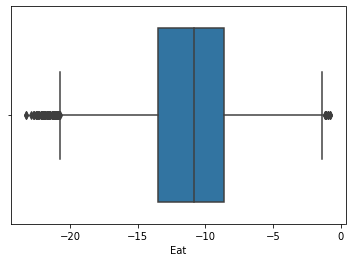

In [32]:
sns.boxplot(df.Eat);

In [25]:
df.Eat.describe()

count    16242.000000
mean       -11.178969
std          3.659133
min        -23.245373
25%        -13.475805
50%        -10.835211
75%         -8.623903
max         -0.789513
Name: Eat, dtype: float64

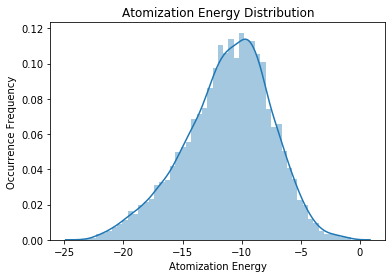

In [33]:
sns.distplot(df.Eat)
plt.xlabel('Atomization Energy')
plt.ylabel('Occurrence Frequency')
plt.title('Atomization Energy Distribution');